In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Class to display section titles for data exploration
class Interface:
    def __init__(self):
        pass

    def interfaz_title(self, title):
        print(f"""
-------------------------------
## {title} ##
-------------------------------
""")

# Class for various plotting utilities
class Plotter:
    def __init__(self):
        pass

    def bar_chart(self, labels, values, color="skyblue", title="Chart", xlabel="X Axis", ylabel="Y Axis"):
        """Draws a bar chart"""
        plt.figure(figsize=(6, 4))
        plt.bar(labels, values, color=color)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    def hist_chart(self, values, bins=5, color="skyblue", edgecolor="black",
                   title="Histogram", xlabel="Value", ylabel="Frequency"):
        """Draws a histogram"""
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.hist(values, bins=bins, color=color, edgecolor=edgecolor)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    def box_chart(self, values, box_color="skyblue", median_color="darkblue",
                  title="Box Plot", xlabel="Value", ylabel="Distribution"):
        """Draws a box plot"""
        fig, ax = plt.subplots(figsize=(6, 4))
        box = ax.boxplot(values, patch_artist=True, vert=False,
                         boxprops=dict(facecolor=box_color, color="black"),
                         medianprops=dict(color=median_color),
                         whiskerprops=dict(color="black"),
                         capprops=dict(color="black"),
                         flierprops=dict(marker="o", markerfacecolor="red", markersize=6, linestyle="none"))
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid(axis="x", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    def line_chart(self, x, y, color="green", marker="o", title="Chart", xlabel="X Axis", ylabel="Y Axis"):
        """Draws a line chart"""
        plt.figure(figsize=(6, 4))
        plt.plot(x, y, color=color, marker=marker)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True, linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

    def frequency_chart(self, data, color="skyblue", title="Frequency Chart",
                        xlabel="Categories", ylabel="Frequency", top_n=None):
        """Draws a frequency bar chart"""
        if not isinstance(data, pd.Series):
            data = pd.Series(data)

        freq = data.value_counts(dropna=False)

        if top_n:
            freq = freq.head(top_n)

        plt.figure(figsize=(6, 4))
        plt.bar(freq.index.astype(str), freq.values, color=color)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

    def scatter_plot(self, x, y, data=None, color="dodgerblue", size=50,
                     alpha=0.7, title="Scatter Plot", xlabel=None, ylabel=None,
                     trendline=False):
        """Draws a scatter plot with optional trendline"""
        x_vals = data[x] if isinstance(x, str) and data is not None else pd.Series(x)
        y_vals = data[y] if isinstance(y, str) and data is not None else pd.Series(y)

        plt.figure(figsize=(8, 6))
        plt.scatter(x_vals, y_vals, c=color, s=size, alpha=alpha)
        plt.title(title)
        plt.xlabel(xlabel if xlabel else x)
        plt.ylabel(ylabel if ylabel else y)
        plt.grid(True, linestyle="--", alpha=0.6)

        if trendline:
            m, b = np.polyfit(x_vals, y_vals, 1)
            plt.plot(x_vals, m * x_vals + b, color="red", linewidth=2, label="Trendline")
            plt.legend()

        plt.tight_layout()
        plt.show()

## Hypothesis

#### "Customers with higher invoice payments tend to purchase fewer units per transaction."

### 1. Import data

In [2]:
import pandas as pd

interface = Interface()
plotter = Plotter()

retail_2009_2010 = pd.read_excel(r"..\..\utils\cleaned_retail_2009.xlsx")
retail_2010_2011 = pd.read_excel(r"..\..\utils\cleaned_retail_2010.xlsx")

retail_2009_2011 = pd.concat([retail_2009_2010, retail_2010_2011], ignore_index=True)

print(retail_2009_2011)

        invoice  stockcode                          description  quantity  \
0        489434      85048  15cm christmas glass ball 20 lights        12   
1        489434      79323                   Pink cherry lights        12   
2        489434      79323                  white cherry lights        12   
3        489434      21232       Strawberry ceramic trinket box        24   
4        489434      22064           Pink doughnut trinket pot         24   
...         ...        ...                                  ...       ...   
689282   581587      22613          Pack of 20 spaceboy napkins        12   
689283   581587      22899         Children's apron dolly girl          6   
689284   581587      23254        Childrens cutlery dolly girl          4   
689285   581587      23255      Childrens cutlery circus parade         4   
689286   581587      22138        Baking set 9 piece retrospot          3   

       invoicedate  price  customer_id         country  
0       2009-12-01

### 2. Knowing price and quantity columns

In this section, we can observe a difference in data dispersion: the price variable has a standard deviation of 1.61, indicating low variability, whereas the quantity variable has a higher standard deviation of 6.70, reflecting greater dispersion in its values.

In [3]:
interface.interfaz_title("Knowing the price column units US")
print(retail_2009_2011["price"].describe())
interface.interfaz_title("Knowing the quantity column")
print(retail_2009_2011["quantity"].describe())


-------------------------------
## Knowing the price column units US ##
-------------------------------

count    689287.000000
mean          2.287798
std           1.614026
min           0.000000
25%           1.250000
50%           1.690000
75%           2.950000
max           7.500000
Name: price, dtype: float64

-------------------------------
## Knowing the quantity column ##
-------------------------------

count    689287.000000
mean          7.323682
std           6.696516
min           1.000000
25%           2.000000
50%           5.000000
75%          12.000000
max          27.000000
Name: quantity, dtype: float64


#### 1. Analysing Quantity records

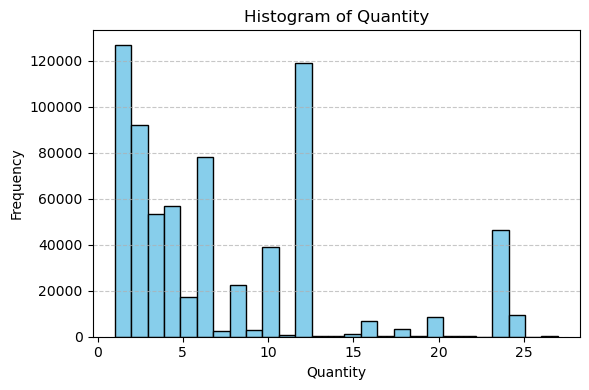

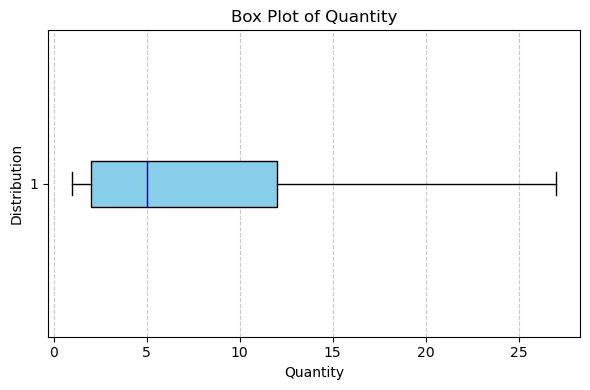

In [4]:
# Convert 'quantity' column to a pandas Series
quantity_series = pd.Series(retail_2009_2011["quantity"].to_list())

# Plot histogram of quantity values
plotter.hist_chart(
    quantity_series,
    bins=27,
    title="Histogram of Quantity",
    xlabel="Quantity",
    ylabel="Frequency"
)

# Plot box plot of quantity distribution
plotter.box_chart(
    quantity_series,
    title="Box Plot of Quantity",
    xlabel="Quantity",
    ylabel="Distribution"
)


#### 2. Analysing Price Records

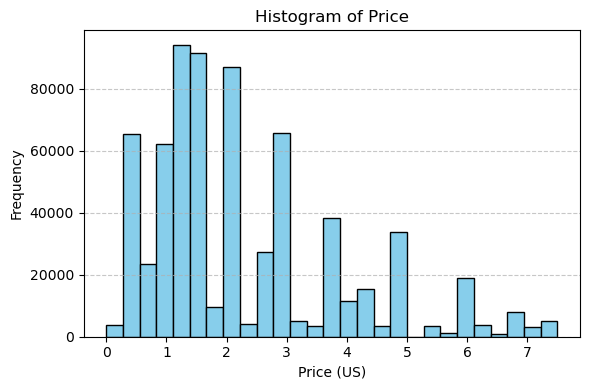

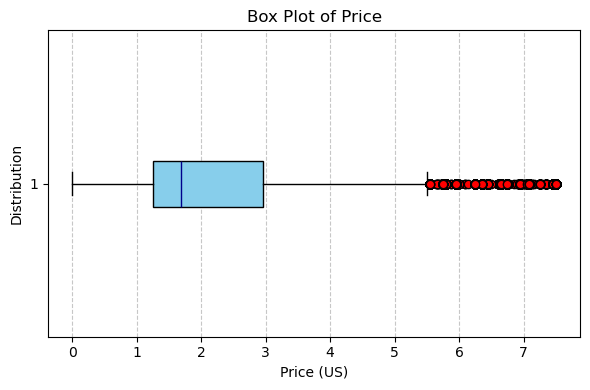

In [5]:
# Convert 'price' column to a pandas Series
price_series = pd.Series(retail_2009_2011["price"].to_list())

# Plot histogram of price values
plotter.hist_chart(
    price_series,
    bins=27,
    title="Histogram of Price",
    xlabel="Price (US)",
    ylabel="Frequency"
)

# Plot box plot of price distribution
plotter.box_chart(
    price_series,
    title="Box Plot of Price",
    xlabel="Price (US)",
    ylabel="Distribution"
)

In [6]:
# Percentage of IQR used to define highest and lowest price thresholds
range = 0  # No extension beyond Q1 and Q3

# Calculate quartiles
Q1 = retail_2009_2011["price"].quantile(0.25)
Q3 = retail_2009_2011["price"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper threshold for highest prices
upper_limit = Q3 + (range * IQR)
print("## Highest and Lowest Price Limits ##")
print("Upper limit:", upper_limit)

# Define lower threshold for lowest prices
lower_limit = Q1 - (range * IQR)
print("Lower limit:", lower_limit)

# Based on a previous adjustment where 50% of the IQR was used to filter out outliers,
# we now consider values starting from Q3 and Q1 as high and low respectively.

# Filter highest price purchases
highest_purchases = retail_2009_2011[retail_2009_2011["price"] >= upper_limit]

# Filter lowest price purchases
lowest_purchases = retail_2009_2011[retail_2009_2011["price"] <= lower_limit]

# Display results
print("## Number of highest price purchases:")
print(highest_purchases.shape[0])

print("## Number of lowest price purchases:")
print(lowest_purchases.value_counts().sum())

## Highest and Lowest Price Limits ##
Upper limit: 2.95
Lower limit: 1.25
## Number of highest price purchases:
217993
## Number of lowest price purchases:
249089


### 3. Analysing highest price purchases

In [7]:
interface.interfaz_title("## Analyzing highest price purchases ##")
print(highest_purchases["price"].describe())



-------------------------------
## ## Analyzing highest price purchases ## ##
-------------------------------

count    217993.000000
mean          4.276848
std           1.264768
min           2.950000
25%           2.950000
50%           3.750000
75%           4.950000
max           7.500000
Name: price, dtype: float64


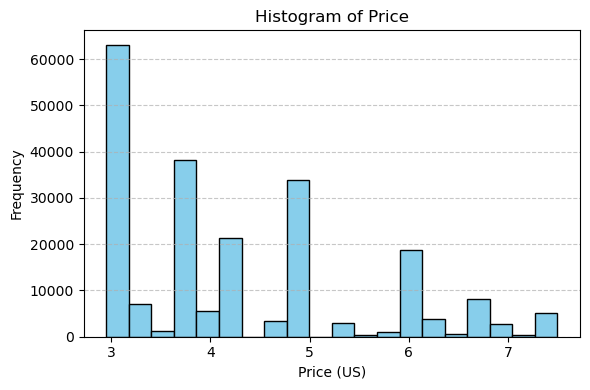

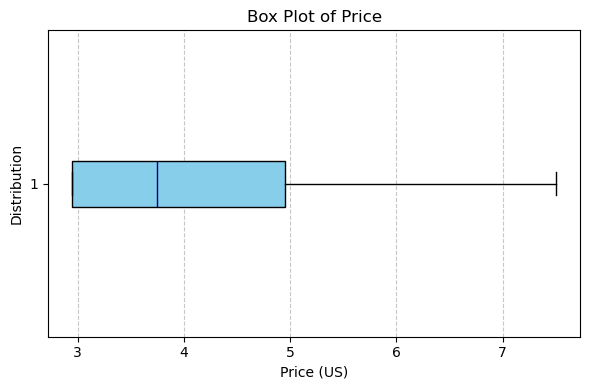

In [8]:
# Convert 'price' values from highest purchases to a pandas Series
price_series = pd.Series(highest_purchases["price"].to_list())

# Plot histogram of high-price purchases
plotter.hist_chart(
    price_series,
    bins=20,
    title="Histogram of Price",
    xlabel="Price (US)",
    ylabel="Frequency"
)

# Plot box plot of high-price purchase distribution
plotter.box_chart(
    price_series,
    title="Box Plot of Price",
    xlabel="Price (US)",
    ylabel="Distribution"
)

#### Analyzing Highest Price Customers

In [9]:
# Calculate the IQR for 'quantity' in the highest price customer dataset
# This percentage represents the portion of IQR used to define quantity thresholds
range = 0

# Compute quartiles
Q1 = highest_purchases["quantity"].quantile(0.25)
Q3 = highest_purchases["quantity"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower limits for quantity
upper_limit = Q3 + (range * IQR)
lower_limit = Q1 - (range * IQR)

# Analyze quantity distribution among highest price purchases
highest_quantity_customers = highest_purchases[highest_purchases["quantity"] >= upper_limit]
lowest_quantity_customers = highest_purchases[highest_purchases["quantity"] <= lower_limit]

# Display limits
interface.interfaz_title("Limit")
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

# Display summary statistics
interface.interfaz_title("Analyzing Highest Quantity Customers")
print(f"## Highest Quantity Customers (quantity >= {upper_limit}) ##")
print(highest_quantity_customers["quantity"].describe())

print(f"## Lowest Quantity Customers (quantity <= {lower_limit}) ##")
print(lowest_quantity_customers["quantity"].describe())


-------------------------------
## Limit ##
-------------------------------

Upper limit: 6.0
Lower limit: 2.0

-------------------------------
## Analyzing Highest Quantity Customers ##
-------------------------------

## Highest Quantity Customers (quantity >= 6.0) ##
count    66108.000000
mean         9.201957
std          4.885673
min          6.000000
25%          6.000000
50%          6.000000
75%         12.000000
max         27.000000
Name: quantity, dtype: float64
## Lowest Quantity Customers (quantity <= 2.0) ##
count    89283.000000
mean         1.417325
std          0.493120
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: quantity, dtype: float64


### Conclusions

- Invoices with higher prices and lower quantities per transaction account for **89,283 records**, representing **40.96%** of the highest-priced invoices.
- Invoices with higher prices and higher quantities per transaction account for **66,108 records**, representing **30%** of the highest-priced invoices.
- Therefore, customers with high-priced invoices tend to purchase fewer units per transaction.